# Разделимость данных

Примените алгоритмы уменьшения размерности к данным из предыдущей лабораторной, объясните полученные результаты

1. С помощью любого из рассмотренных на лекциях алгоритмов снижения размерности спроецируйте тренировочные данные в 2d пространство. Визуализируйте результаты снижения размерности. Цветом обозначьте категорию объекта
1. Примените алгоритм кластеризации к спроецированным данным. Расчитайте средние внутрикластерное и межкласторное расстояния получившейся проекции
1. Опишите результаты 

[tabular playground series oct 2021](https://www.kaggle.com/c/tabular-playground-series-oct-2021)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.metrics import rand_score
from sklearn import metrics

In [3]:
ds = pd.read_csv('content/gan_generated.csv')
ds.head()

,Unnamed: 0,id,f0,f1,f2,f3,f4,f5,f6,f7,...,f276,f277,f278,f279,f280,f281,f282,f283,f284,target
0,0,0,0.205979,0.410993,0.176775,0.223581,0.423543,0.476140,0.413590,0.612021,...,0,1,0,0,0,0,0,0,0,1
1,1,1,0.181004,0.473119,0.011734,0.213657,0.619678,0.441593,0.230407,0.686013,...,0,1,0,0,0,0,0,0,0,1
2,2,2,0.182583,0.307431,0.325950,0.207116,0.605699,0.309695,0.493337,0.751107,...,0,0,0,1,1,0,0,0,0,1
3,3,3,0.180240,0.494592,0.008367,0.223580,0.760618,0.439211,0.432055,0.776147,...,0,0,0,0,1,0,0,0,0,1
4,4,4,0.177172,0.495513,0.014263,0.548819,0.625396,0.562493,0.117158,0.561255,...,0,1,1,0,1,0,0,1,0,1


In [4]:
X, y = ds.drop(['id', 'target', 'Unnamed: 0'], axis=1, inplace=False), ds['target']
X.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284
0,0.205979,0.410993,0.176775,0.223581,0.423543,0.476140,0.413590,0.612021,0.534873,0.147295,...,0,0,1,0,0,0,0,0,0,0
1,0.181004,0.473119,0.011734,0.213657,0.619678,0.441593,0.230407,0.686013,0.281971,0.238509,...,1,0,1,0,0,0,0,0,0,0
2,0.182583,0.307431,0.325950,0.207116,0.605699,0.309695,0.493337,0.751107,0.536272,0.286813,...,0,0,0,0,1,1,0,0,0,0
3,0.180240,0.494592,0.008367,0.223580,0.760618,0.439211,0.432055,0.776147,0.483958,0.260886,...,1,0,0,0,0,1,0,0,0,0
4,0.177172,0.495513,0.014263,0.548819,0.625396,0.562493,0.117158,0.561255,0.077115,0.158321,...,0,0,1,1,0,1,0,0,1,0


In [5]:
tsne = TSNE(n_components=2, random_state=2)

X_reduced = tsne.fit_transform(X)

Projecting 285-dimensional data to 2D


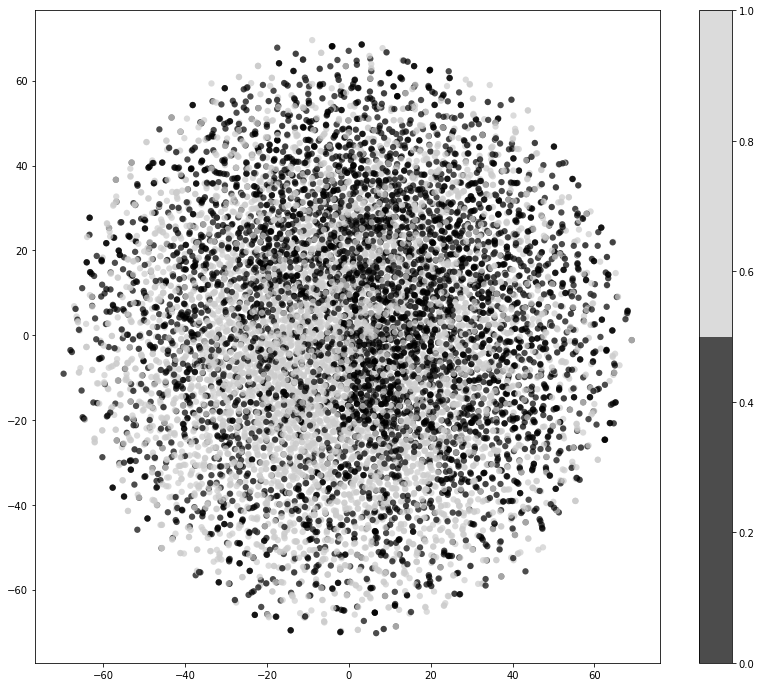

In [6]:
print(f'Projecting {X.shape[1]}-dimensional data to 2D')

plt.figure(figsize=(14,12))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.show()

# Кластеризация

In [15]:
ds_pred = Birch(n_clusters=2).fit_predict(X_reduced)

Projecting 285-dimensional data to 2D


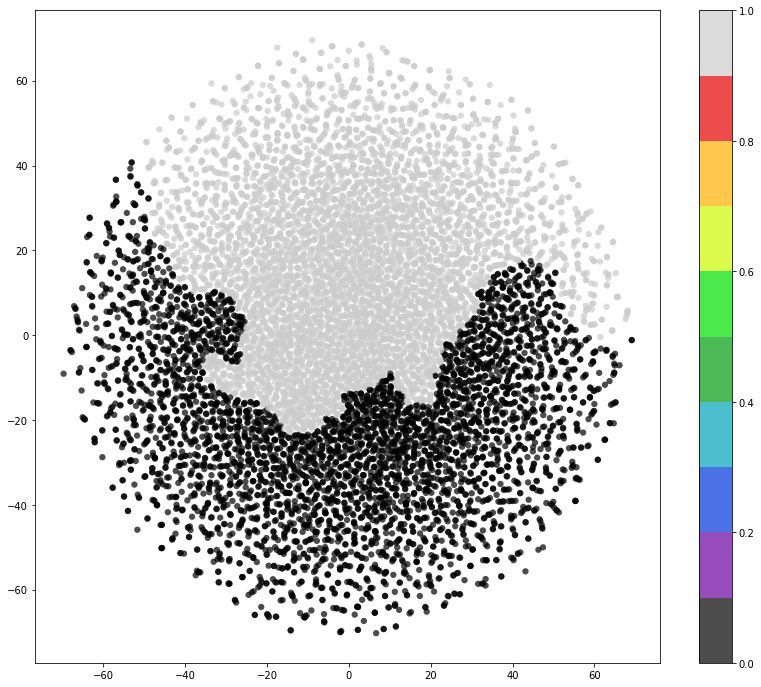

In [16]:
print(f'Projecting {X.shape[1]}-dimensional data to 2D')

plt.figure(figsize=(14,12))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=ds_pred,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

In [19]:
res = Birch(n_clusters=2).fit(X_reduced)

print(f'Silhouett score (within cluster): {metrics.silhouette_score(X_reduced, res.labels_)}, Rand score: {metrics.rand_score(y, res.labels_)}')

Silhouett score (within cluster): 0.2586548924446106, Rand score: 0.5029302130213021
